<img src = "https://github.com/HarryVargas96/UdeCataluna/blob/main/logo_uc_grande.png?raw=true" alt = "Encabezado" width = "100%">  </img>

# Selección de Características en Machine Learning

En este notebook exploraremos tres metodologías para reducir la dimensionalidad y seleccionar las características más relevantes en un conjunto de datos:

1. **PCA (Análisis de Componentes Principales):**  
   Técnica de extracción de características que transforma los datos a un nuevo espacio de menor dimensión, maximizando la varianza.
   
2. **SelectKBest:**  
   Selecciona las *k* mejores características en base a una función de puntuación (en este ejemplo usaremos *f_classif* para datos de clasificación).
   
3. **Mutual Information (Información Mutua):**  
   Mide la dependencia entre cada característica y la variable objetivo, permitiendo identificar qué características comparten mayor información con el target.

En este ejemplo utilizaremos un conjunto de datos sintético para fines demostrativos.


In [ ]:
# Importación de librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler

# Para que los gráficos se muestren en el notebook
%matplotlib inline

## 1. Generación del Conjunto de Datos

Utilizaremos la función `make_classification` de scikit-learn para generar un conjunto de datos sintético con 500 muestras y 10 características, de las cuales 5 serán informativas y 2 redundantes.

In [ ]:
# Generación del conjunto de datos sintético
X, y = make_classification(n_samples=500,
                           n_features=10,
                           n_informative=5,
                           n_redundant=2,
                           random_state=42)

# Convertimos a DataFrame para una mejor visualización
df = pd.DataFrame(X, columns=[f"feature_{i}" for i in range(10)])
df['target'] = y
df.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,target
0,2.365398,-2.405070,1.454530,0.635454,0.331485,0.255484,0.141766,-1.884458,-1.619777,0.423212,0
1,1.466359,1.431838,2.492688,1.662741,0.845526,2.768129,1.151220,-1.278432,-0.076903,-0.721963,0
2,0.818121,-0.408409,-1.230546,1.709158,1.591019,1.030478,-0.205769,0.312407,2.566689,0.889988,0
3,0.173130,-2.019461,-0.303312,0.222706,0.531745,-0.340094,0.186762,-3.133564,2.682247,2.633538,0
4,-1.075339,1.231863,-1.169158,-1.186858,-0.715022,3.330301,-1.028577,1.840620,1.002101,-1.151868,1


## 2. Preprocesamiento: Escalado de Características

Es recomendable escalar las características antes de aplicar métodos como PCA o SelectKBest. Utilizaremos `StandardScaler` para normalizar los datos.

In [ ]:
# Escalado de las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[:5]

array([[ 1.06593429, -1.45949674,  1.0523225 ,  0.09344867,  0.3543332 ,
        -0.1319283 ,  0.12220925, -1.1860144 , -1.403514  ,  0.44530159],
       [ 0.54844938,  1.40194667,  1.68490272,  0.75874734,  0.86094881,
         1.61998629,  1.17511465, -0.80239679, -0.38982164, -0.74847582],
       [ 0.17532504,  0.02954955, -0.58377187,  0.78880809,  1.5956735 ,
         0.40842825, -0.24028471,  0.2046118 ,  1.34705959,  0.9318869 ],
       [-0.1959302 , -1.17192148, -0.01878181, -0.17385749,  0.55170011,
        -0.54718807,  0.1691423 , -1.97670413,  1.4229829 ,  2.74943424],
       [-0.91454628,  1.25281185, -0.54636673, -1.08672902, -0.67705732,
         2.01195452, -1.09851014,  1.17197746,  0.31910082, -1.19662622]])

## 3. Método 1: PCA (Análisis de Componentes Principales)

PCA transforma las características originales a un nuevo conjunto de variables (componentes principales) que son combinaciones lineales de las originales y que retienen la mayor parte de la varianza.

In [ ]:
from sklearn.decomposition import PCA

# Aplicamos PCA para reducir a 2 componentes principales
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Mostramos la proporción de varianza explicada por cada componente
print("Proporción de varianza explicada por cada componente:", pca.explained_variance_ratio_)

Proporción de varianza explicada por cada componente: [0.29174951 0.14707504]


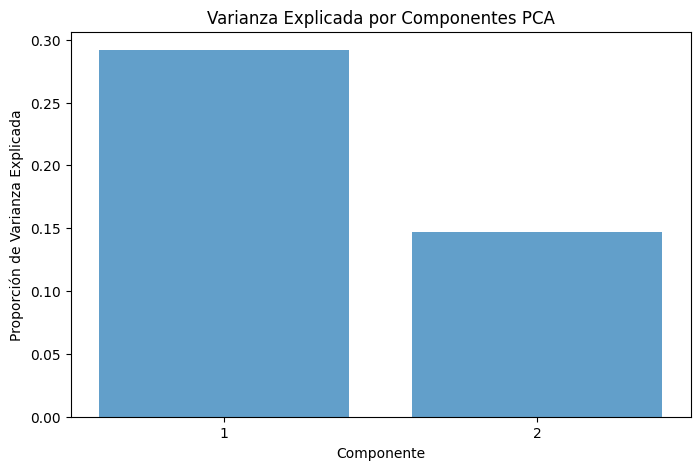

In [ ]:
# Gráfica de la varianza explicada
plt.figure(figsize=(8,5))
plt.bar(range(1, 3), pca.explained_variance_ratio_, alpha=0.7, align='center')
plt.xlabel('Componente')
plt.ylabel('Proporción de Varianza Explicada')
plt.title('Varianza Explicada por Componentes PCA')
plt.xticks([1, 2])
plt.show(
)

### Interpretación:
El **primer componente principal (PC1) captura el 29.17%** de la variabilidad total de los datos originales. Esto significa que este componente es el más informativo en términos de varianza, por lo que los datos proyectados en este eje contienen la mayor parte de la información de los datos originales.

El **segundo componente principal (PC2) captura el 14.71%** de la variabilidad total. Es menos informativo que el primer componente, pero sigue contribuyendo con información significativa.

**Suma de la varianza explicada: 0.2917 + 0.1471 = 0.4388 (43.88%).**
Esto significa que, al reducir las dimensiones a solo dos componentes principales, retienes aproximadamente el 43.88% de la información contenida en los datos originales.

Decisión sobre más componentes:
Si el 43.88% no es suficiente para tu análisis, podrías considerar agregar más componentes principales para capturar más varianza. Normalmente, se buscan valores superiores al 70-80% de varianza explicada para reducir la pérdida de información.

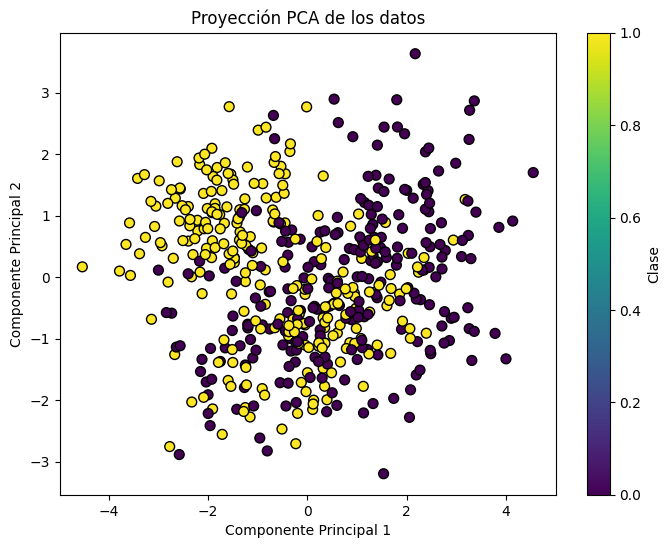

In [ ]:
# Visualización de los datos proyectados en el espacio PCA
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Proyección PCA de los datos')
plt.colorbar(label='Clase')
plt.show()

## 4. Método 2: SelectKBest con f_classif

SelectKBest selecciona las *k* características con los valores de puntuación más altos. Utilizaremos la función de puntuación `f_classif` (ANOVA) para evaluar la relevancia de cada característica en problemas de clasificación.

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

# Seleccionamos las 5 mejores características
selector = SelectKBest(score_func=f_classif, k=5)
X_new = selector.fit_transform(X_scaled, y)

# Obtenemos los índices de las características seleccionadas
selected_indices = selector.get_support(indices=True)
print("Índices de las características seleccionadas:", selected_indices)

# Mostramos las puntuaciones de todas las características
feature_scores = selector.scores_
for idx, score in enumerate(feature_scores):
    print(f"Feature {idx}: Score = {score:.2f}")

Índices de las características seleccionadas: [0 1 3 5 8]
Feature 0: Score = 229.15
Feature 1: Score = 76.27
Feature 2: Score = 17.43
Feature 3: Score = 75.06
Feature 4: Score = 0.01
Feature 5: Score = 72.33
Feature 6: Score = 0.00
Feature 7: Score = 0.47
Feature 8: Score = 58.54
Feature 9: Score = 0.01


## 5. Método 3: Mutual Information (Información Mutua)

La información mutua mide la dependencia entre cada característica y la variable objetivo, sin asumir relaciones lineales. Es especialmente útil cuando la relación entre variables no es lineal.

In [ ]:
from sklearn.feature_selection import mutual_info_classif

# Calculamos la información mutua para cada característica
mi = mutual_info_classif(X_scaled, y, random_state=42)
mi_series = pd.Series(mi, index=[f"feature_{i}" for i in range(X_scaled.shape[1])])
mi_series = mi_series.sort_values(ascending=False)

print("Puntuaciones de Mutual Information:")
print(mi_series)

Puntuaciones de Mutual Information:
feature_0    0.194123
feature_1    0.129449
feature_8    0.115916
feature_3    0.104875
feature_2    0.097245
feature_5    0.087287
feature_9    0.017613
feature_4    0.016971
feature_7    0.000000
feature_6    0.000000
dtype: float64


In [ ]:
# Seleccionamos las 5 características con mayor información mutua
top_features = mi_series.index[:5]
print("\nTop 5 características según Mutual Information:", top_features.tolist())


Top 5 características según Mutual Information: ['feature_0', 'feature_1', 'feature_8', 'feature_3', 'feature_2']


## Conclusiones

- **PCA:**  
  Es ideal para reducir la dimensionalidad y visualizar los datos, pero transforma las características, lo que puede dificultar la interpretación en términos de las variables originales.

- **SelectKBest (f_classif):**  
  Permite seleccionar directamente las características más relevantes según una medida estadística (ANOVA en este caso), lo que es útil cuando se desea trabajar con las variables originales.

- **Mutual Information:**  
  Ofrece una medida flexible (no lineal) de la dependencia entre cada característica y la variable objetivo, ayudando a identificar características informativas que podrían no ser detectadas mediante métodos lineales.

Cada método tiene sus ventajas y se debe elegir en función de la naturaleza de los datos y el problema específico a resolver.
